## Transfer Learning VGG16 using Tensorflow 

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [4]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights
##vgg16

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58889256/58889256 [==============================] - 14s 0us/step


In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')
folders

['Datasets/Datasets/train\\audi',
 'Datasets/Datasets/train\\lamborghini',
 'Datasets/Datasets/train\\mercedes']

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/test/*')
folders

['Datasets/Datasets/test\\audi',
 'Datasets/Datasets/test\\lamborghini',
 'Datasets/Datasets/test\\mercedes']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ASIM\AppData\Local\Temp\ipykernel_13396\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 45s 36s/step - loss: 1.6876 - accuracy: 0.3750 - val_loss: 2.9814 - val_accuracy: 0.1724
Epoch 2/50
2/2 [==============================] - 34s 26s/step - loss: 1.3460 - accuracy: 0.5312 - val_loss: 0.8278 - val_accuracy: 0.6897
Epoch 3/50
2/2 [==============================] - 42s 30s/step - loss: 0.9768 - accuracy: 0.5625 - val_loss: 0.9750 - val_accuracy: 0.6379
Epoch 4/50
2/2 [==============================] - 32s 22s/step - loss: 0.5177 - accuracy: 0.7812 - val_loss: 0.6216 - val_accuracy: 0.7414
Epoch 5/50
2/2 [==============================] - 30s 22s/step - loss: 0.2963 - accuracy: 0.8750 - val_loss: 1.1329 - val_accuracy: 0.4310
Epoch 6/50
2/2 [==============================] - 30s 21s/step - loss: 0.4166 - accuracy: 0.7812 - val_loss: 0.7659 - val_accuracy: 0.6379
Epoch 7/50
2/2 [==============================] - 30s 22s/step - loss: 0.2423 - accuracy: 0.9375 - val_loss: 0.4665 - val_accuracy: 0.8103
Epoch 8/50
2/2 [===========

In [16]:
r.history

{'loss': [1.6875882148742676,
  1.3460443019866943,
  0.9768096208572388,
  0.5177420377731323,
  0.2963119149208069,
  0.4166069030761719,
  0.2422652542591095,
  0.10642649978399277,
  0.19457262754440308,
  0.11750324070453644,
  0.11424751579761505,
  0.07515648007392883,
  0.04333861172199249,
  0.05104687064886093,
  0.028034087270498276,
  0.04864715039730072,
  0.0368691086769104,
  0.026203060522675514,
  0.019681693986058235,
  0.012667126022279263,
  0.025099482387304306,
  0.02260042354464531,
  0.014712333679199219,
  0.014817016199231148,
  0.007035128306597471,
  0.015396607108414173,
  0.019482336938381195,
  0.008280526846647263,
  0.010263513773679733,
  0.008374999277293682,
  0.011953325010836124,
  0.0062346807681024075,
  0.009126314893364906,
  0.007034600712358952,
  0.008896289393305779,
  0.007623729296028614,
  0.005684960633516312,
  0.007181667722761631,
  0.006181796081364155,
  0.004954098723828793,
  0.008120693266391754,
  0.0050545562990009785,
  0.006

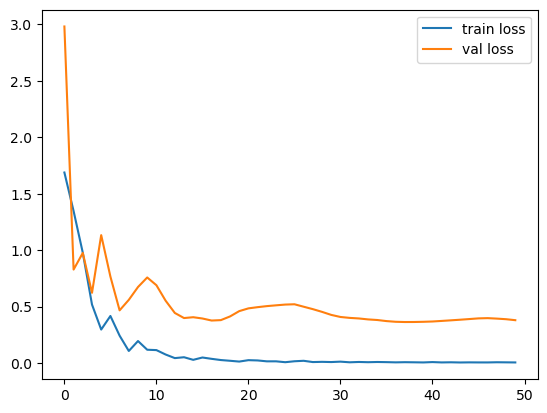

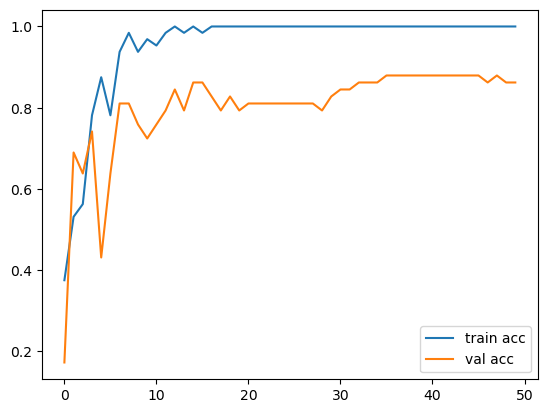

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg.h5')

In [19]:

y_pred = model.predict(test_set)


2/2 [==============================] - 20s 8s/step


In [20]:
y_pred

array([[4.25575068e-04, 9.95440364e-01, 4.13409155e-03],
       [8.86044919e-01, 1.27007309e-02, 1.01254396e-01],
       [4.43264067e-01, 1.30469305e-02, 5.43689013e-01],
       [5.26123084e-02, 4.72677350e-02, 9.00119901e-01],
       [8.51277728e-03, 9.46745455e-01, 4.47418094e-02],
       [7.31383115e-02, 6.79719031e-01, 2.47142732e-01],
       [2.13884339e-02, 3.72862846e-01, 6.05748773e-01],
       [2.78550549e-03, 3.75840673e-03, 9.93456066e-01],
       [9.99943137e-01, 2.22941003e-06, 5.46040937e-05],
       [2.32734492e-05, 9.99563515e-01, 4.13214089e-04],
       [9.93695915e-01, 3.23992805e-04, 5.98011864e-03],
       [2.58679967e-04, 9.98912692e-01, 8.28733260e-04],
       [2.21626312e-02, 4.38806377e-02, 9.33956742e-01],
       [8.74146581e-01, 1.13436617e-01, 1.24168433e-02],
       [1.36973672e-02, 4.46817070e-01, 5.39485514e-01],
       [1.70148849e-01, 2.22290913e-03, 8.27628255e-01],
       [1.71164181e-02, 9.74449754e-01, 8.43385141e-03],
       [2.37174943e-01, 6.52139

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_vgg.h5')

In [25]:
img=image.load_img('download.jfif',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[ 42.,  33.,  24.],
        [ 48.,  39.,  30.],
        [ 51.,  43.,  32.],
        ...,
        [158., 132., 119.],
        [126., 100.,  87.],
        [150., 124., 111.]],

       [[ 21.,  12.,   3.],
        [ 32.,  23.,  14.],
        [ 39.,  31.,  20.],
        ...,
        [116.,  90.,  77.],
        [ 97.,  71.,  58.],
        [104.,  78.,  65.]],

       [[ 21.,  12.,   3.],
        [ 32.,  23.,  14.],
        [ 39.,  31.,  20.],
        ...,
        [116.,  90.,  77.],
        [ 97.,  71.,  58.],
        [104.,  78.,  65.]],

       ...,

       [[ 49.,  45.,  46.],
        [ 49.,  45.,  46.],
        [ 49.,  45.,  46.],
        ...,
        [ 63.,  61.,  66.],
        [ 71.,  69.,  74.],
        [ 71.,  69.,  74.]],

       [[ 49.,  45.,  46.],
        [ 49.,  45.,  46.],
        [ 49.,  45.,  46.],
        ...,
        [ 63.,  61.,  66.],
        [ 71.,  69.,  74.],
        [ 71.,  69.,  74.]],

       [[ 45.,  41.,  42.],
        [ 45.,  41.,  42.],
        [ 45.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 0s 343ms/step


array([[0.02469814, 0.00120256, 0.9740993 ]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 250ms/step


In [32]:
a

array([2], dtype=int64)